 # Cardiovascular Diseases - Heart Failure Prediction
    
   Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives 
   each year, which accounts for 31% of all deaths worlwide. Heart failure is a common event caused by CVDs and this
   dataset contains 12 features that can be used to predict mortality by heart failure.

   Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

   People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk 
   factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and 
   management wherein a machine learning model can be of great help.
    
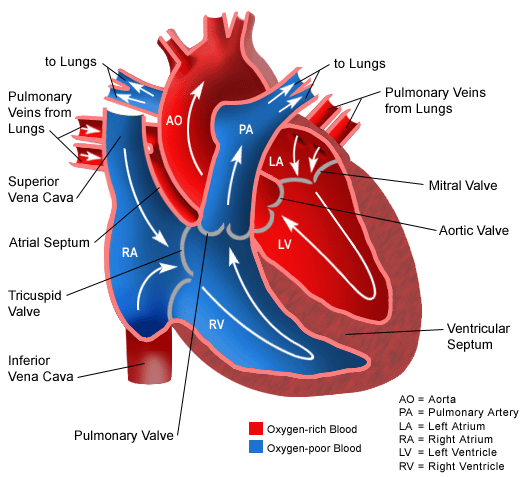
    
 ## Dataset Link 
 
 https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
 
 ## Dataset Description
 
 Feature | Explanation | Measurement	| Range
------------- | ------------- |------------- | -------------
Age	|Age of the patient	|Years |	[40,..., 95]
Anaemia	|Decrease of red <br> blood cells or hemoglobin |	Boolean|	0, 1
High blood pressure |	If a patient has hypertension |	Boolean	 |0, 1
Creatinine phosphokinase<br>(CPK) |	Level of the CPK enzyme <br>in the blood |	mcg/L|	[23,..., 7861]
Diabetes|	If the patient has diabetes |	Boolean	| 0, 1
Ejection fraction|	Percentage of blood leaving<br>the heart at each contraction|Percentage	|	[14,..., 80]
Sex	| Woman or man |	Binary|	0, 1
Platelets|	Platelets in the blood|	kiloplatelets/mL|	[25.01,..., 850.00]
Serum creatinine|	Level of creatinine in the blood|	mg/dL|	[0.50,..., 9.40]
Serum sodium|	Level of sodium in the blood|	mEq/L|	[114,..., 148]
Smoking|	If the patient smokes|	Boolean	|0, 1
Time|	Follow-up period|	Days|	[4,...,285]
DEATH EVENT<br>(TARGET)|	If the patient died during the follow-up period|	Boolean|	0, 1

**NOTE: mcg/L: micrograms per liter. mL: microliter. mEq/L: milliequivalents per litre**
 
 ### References
 
    Machine learning can predict survival of patients with heart failure from serum creatinine and 
    ejection fraction alone. (03 February 2020)
   https://doi.org/10.1186/s12911-020-1023-5

### Required Libraries and Utilities

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score, matthews_corrcoef
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from scipy.stats import randint 

from imblearn.over_sampling import SMOTE
from collections import Counter

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [2]:
from ReusableUtils import ReusableUtils
utils = ReusableUtils()

### Set Notebook Configuration Parameters 

In [3]:
utils.setNotebookConfigParams()

### Utility Functions

### Import Data

In [4]:
heart_faliure_data = pd.read_csv(filepath_or_buffer = './data/heart_failure_clinical_records_dataset.csv', 
                                 low_memory = False, 
                                 skipinitialspace = True, 
                                 float_precision = 'round_trip')

heart_faliure_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
heart_faliure_data.shape

(299, 13)

In [6]:
# Check the total missing values in each column.
print("Total NULL Values in each columns")
print("*********************************")
print(heart_faliure_data.isnull().sum())

Total NULL Values in each columns
*********************************
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


***This looks to be a clean dataset without any missing values...***

## Data Preparation

### Data Normalization

In [7]:
# scaler = MinMaxScaler(feature_range=(0,100))

# heart_faliure_data['platelets'] = scaler.fit_transform(heart_faliure_data[['platelets']])
# heart_faliure_data['creatinine_phosphokinase'] = scaler.fit_transform(heart_faliure_data[['creatinine_phosphokinase']])

### Test - Train Split

In [8]:
# X = heart_faliure_data[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 
# 'creatinine_phosphokinase', 'time']]

# X = heart_faliure_data[['age', 'time','ejection_fraction','serum_creatinine', 'serum_sodium']] 

# X = heart_faliure_data[['ejection_fraction', 'serum_creatinine']]

X = heart_faliure_data[['time','ejection_fraction','serum_creatinine']]

# X = heart_faliure_data[['age','ejection_fraction','serum_sodium']]

y = heart_faliure_data[['DEATH_EVENT']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.85, test_size = 0.15, random_state = 2)

print("X_Train Shape:", X_train.shape)
print("Y_Train Shape:", y_train.shape)
print("X_Test Shape:", X_test.shape)
print("Y_Test Shape:", y_test.shape)

X_Train Shape: (254, 3)
Y_Train Shape: (254, 1)
X_Test Shape: (45, 3)
Y_Test Shape: (45, 1)


#### Data Value Counts

In [9]:
print('Original dataset shape %s' % Counter(y_train.values.ravel()))

Original dataset shape Counter({0: 171, 1: 83})


In [10]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

#### <font color = brown>Data Insight 17:</font>

**`1. As we see in the training data, the number of 1s (80 - Death Event) are much less comapred to the number of 0s (174 - Survival Case). This is also confirmed in the Data Insight 15.`**

**`2. With this imbalance dataset (67.89% survival cases & 32.11% death events), the model could become more inclined towards learnign and predicting the negative examples than the positive (death) cases.`**

**`3. To avoid this scenario and create an un-biased model, the dataset should be balanced where we need to generate more  examples of the minority class. We will apply the Synthetic Minority Oversampling Technique (SMOTE) algorithm on the training data such that more examples of the death events are generated and we have a balanced dataset.`**

#### Synthetic Minority Oversampling Technique (SMOTE)

In [11]:
# Implement SMOTE
sampling = SMOTE(random_state = 100)
X_train_resampled, y_train_resampled = sampling.fit_resample(X_train.values, y_train.values.ravel())
    
# Shuffle the data
perms = np.random.permutation(X_train_resampled.shape[0])
X_train_resampled = X_train_resampled[perms]
y_train_resampled = y_train_resampled[perms]

X_train_resampled = pd.DataFrame(data = X_train_resampled)
y_train_resampled = pd.DataFrame(data = y_train_resampled)

print(X_train_resampled.shape)
print(y_train_resampled.shape)

(342, 3)
(342, 1)


In [12]:
print('Original dataset shape %s' % Counter(y_train.values.ravel()))
print('Resampled dataset shape %s' % Counter(y_train_resampled.values.ravel()))
print('Test dataset shape %s' % Counter(y_test.values.ravel()))

Original dataset shape Counter({0: 171, 1: 83})
Resampled dataset shape Counter({1: 171, 0: 171})
Test dataset shape Counter({0: 32, 1: 13})


#### <font color = brown>Data Balancing Significance</font>

**`1. With the application of SMOTE on the training data, the number of 1s (Death Event) are now equal to the number of 0s (Survival Case) with each 171 records respectively.`**

- **2. This will ensure  -**
    - 2.1 There are equal data points for both positive and negative scenarios and we have a balanced dataset.
    - 2.2 The model will not be biased during training phase by seeing more example of Survival scenarios.


## Reusable Utilities & Functions

## Model Building & Training

To predict patients survival due to heart failure, we will train models from different machine learning algorithms. The classifiers to be used in this study will be -

**`1. Support Vector Machines with RBF kernel`**

**`2. Decision Tree`**

**`3. Random Forest`**

**`4. Gradient Boosting - XGBoost`**

**`5. Light GBM`**

### 1. Support Vector Machines with RBF kernel

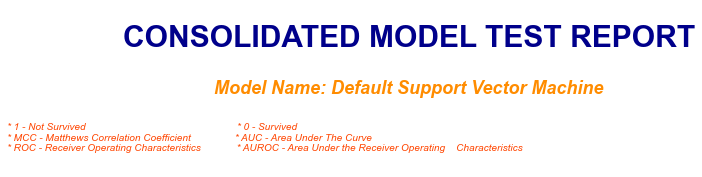

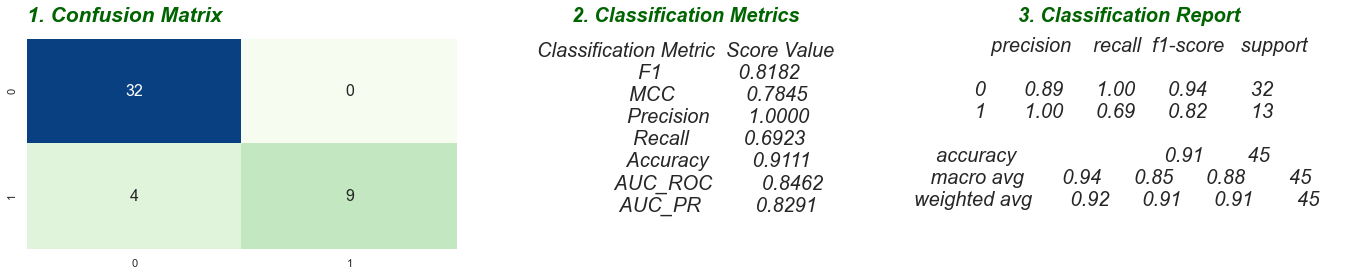

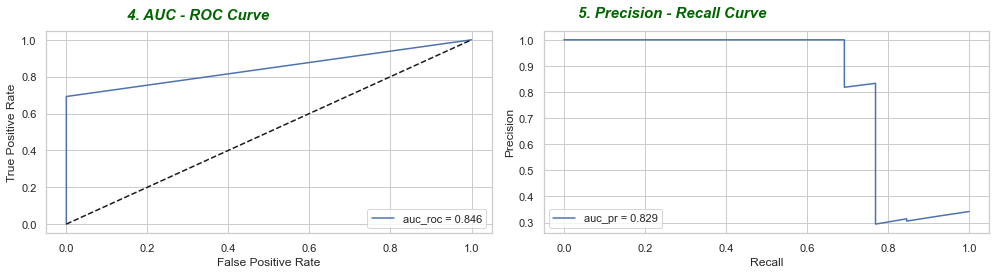

In [13]:
# SVM with Default Parameters and probability = True

svm = SVC(kernel = 'rbf', probability = True, random_state = 100)

svm = svm.fit(X_train.values, y_train.values.ravel())


# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(svm, X_test, y_test, model_name="Default Support Vector Machine")

#### SVM Hyperparameters Tuning

In [14]:
# GridSearchCV to find best parameters for svm
svm = SVC(kernel = 'rbf', probability = True, random_state = 100)

# parameters to build the model on
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}  

grid_search = GridSearchCV(estimator = svm, param_grid = param_grid, 
                  scoring = 'accuracy', n_jobs = -1, cv = 5, verbose = 2)

# fitting the model for grid search 
# grid_search.fit(X_train.values, y_train.values.ravel())
grid_search.fit(X_train.values, y_train.values.ravel())
    
# get the best parameter from gird search 
print("Best Parameters:", grid_search.best_params_) 
  
# get the best classifier model after hyper-parameter tuning 
print("\nBest Classifier:", grid_search.best_estimator_) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters: {'C': 10, 'gamma': 0.001}

Best Classifier: SVC(C=10, gamma=0.001, probability=True, random_state=100)


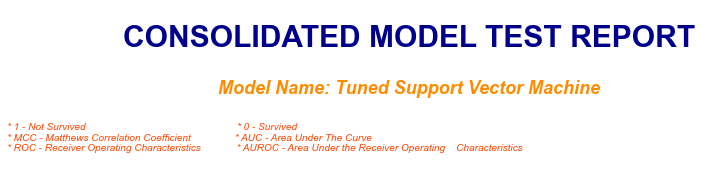

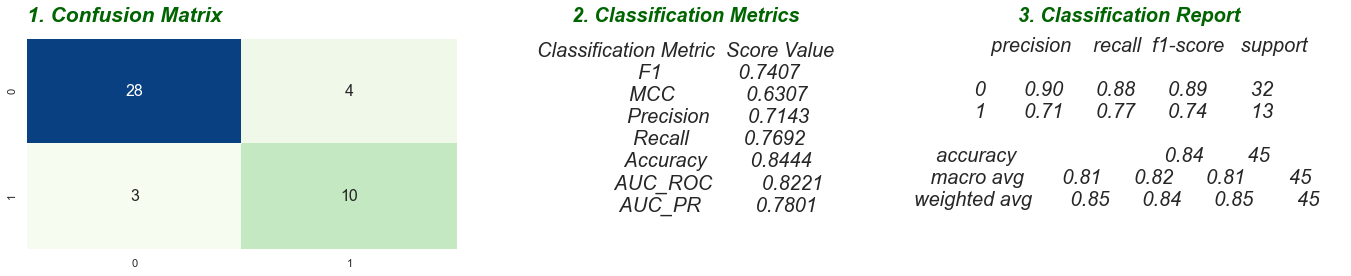

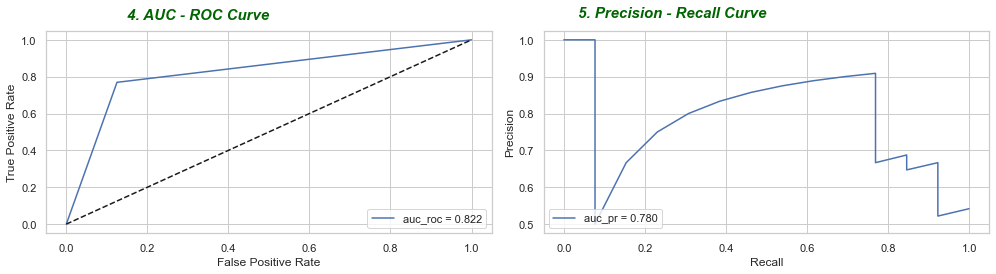

In [15]:
best_svc = grid_search.best_estimator_

best_svc.fit(X_train_resampled.values, y_train_resampled.values.ravel())


# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(best_svc, X_test, y_test, model_name="Tuned Support Vector Machine")

### 2. Decision Tree

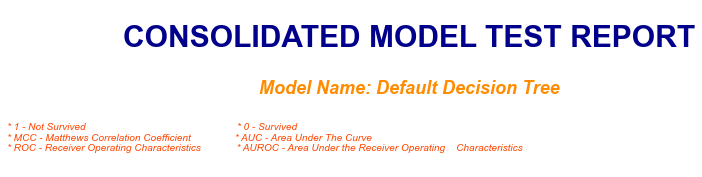

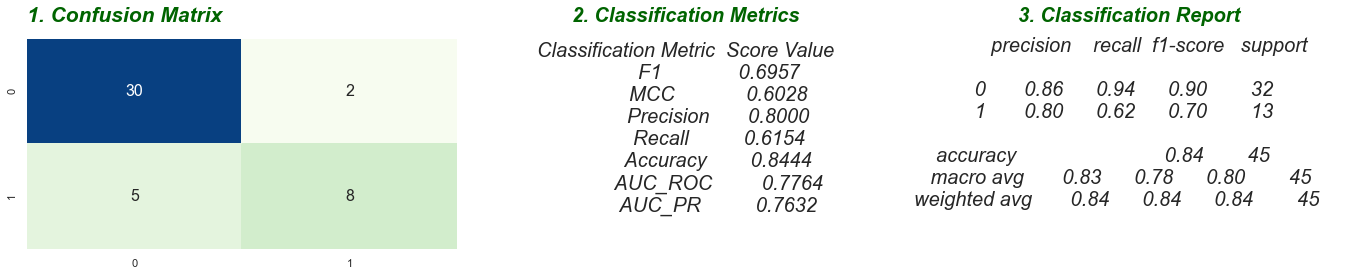

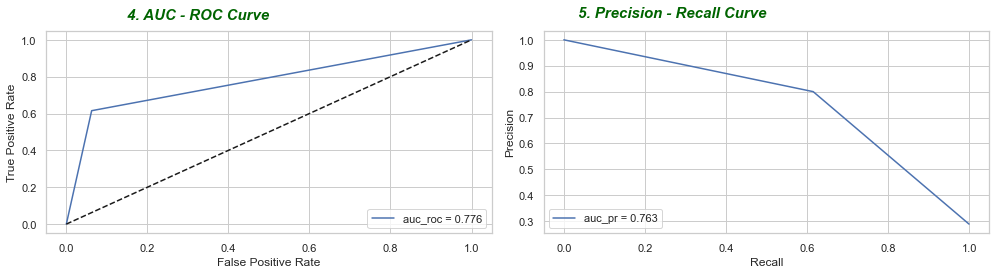

In [16]:
# Decision Tree with Default Parameters

tree = DecisionTreeClassifier(random_state = 100)

tree = tree.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(tree, X_test, y_test, model_name="Default Decision Tree")

#### Decision Tree Hyperparameters Tuning

In [17]:
# GridSearchCV to find the optimal tree parameters
tree = DecisionTreeClassifier(random_state = 100)

# parameters to build the model on
param_grid = {"max_depth": range(1, 30), 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9),
              "min_samples_split":range(2, 10),
              "criterion": ["gini", "entropy"]}

# Instantiating RandomizedSearchCV object 
tree_grid = RandomizedSearchCV(tree, param_grid, cv = 5) 
    
# fitting the model for grid search 
tree_grid.fit(X_train_resampled.values, y_train_resampled.values.ravel())
    
# get the best parameter from gird search 
print("Best Parameters:", tree_grid.best_params_) 
  
# get the best classifier model after hyper-parameter tuning 
print("\nBest Classifier:", tree_grid.best_estimator_) 

Best Parameters: {'criterion': 'entropy', 'max_depth': 25, 'max_features': 1, 'min_samples_leaf': 5, 'min_samples_split': 3}

Best Classifier: DecisionTreeClassifier(criterion='entropy', max_depth=25, max_features=1,
                       min_samples_leaf=5, min_samples_split=3,
                       random_state=100)


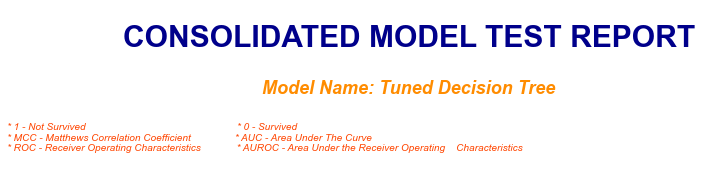

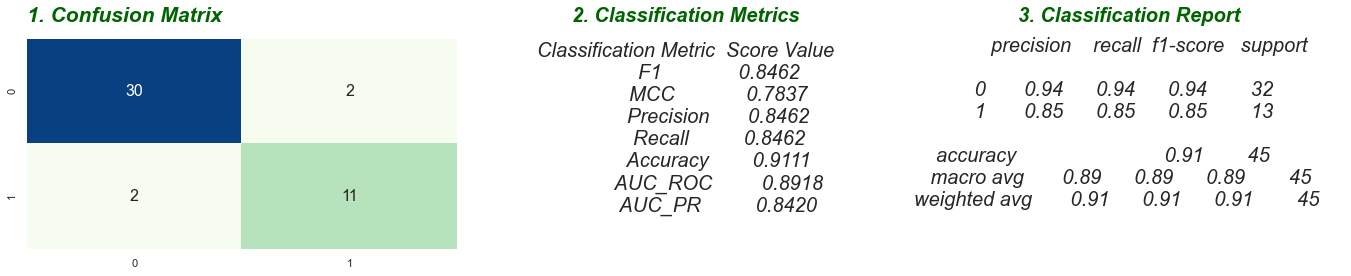

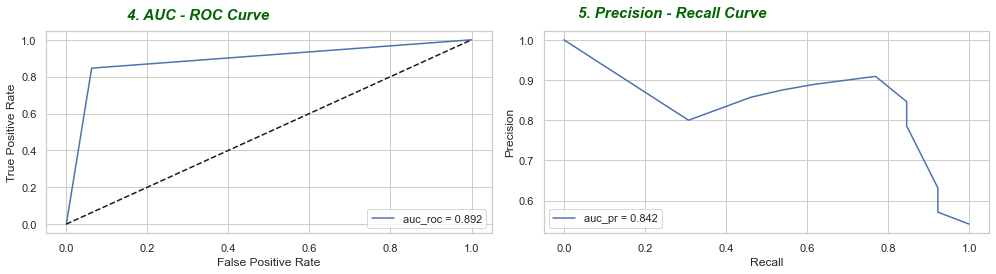

In [18]:
best_tree = tree_grid.best_estimator_

best_tree = best_tree.fit(X_train.values, y_train.values.ravel())

# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(best_tree, X_test, y_test, model_name="Tuned Decision Tree")

### 3. Random Forest

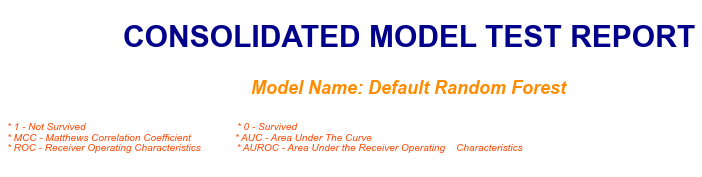

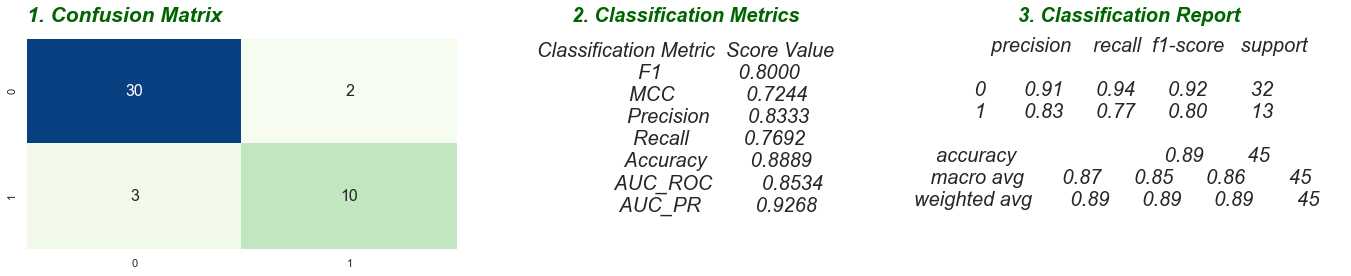

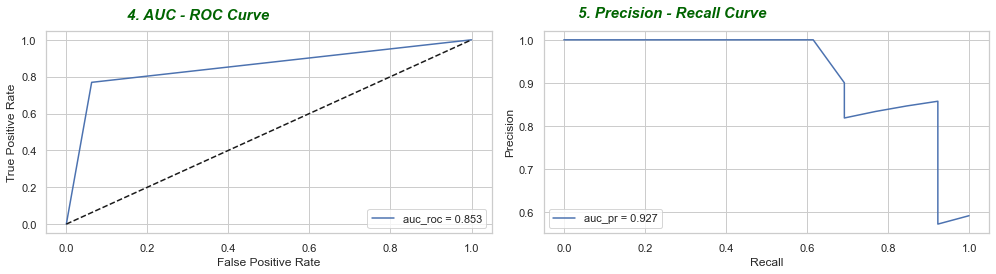

In [19]:
# Random Forest with Default Parameters
rfc = RandomForestClassifier(n_jobs = -1, random_state = 100)

rfc = rfc.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(rfc, X_test, y_test, model_name="Default Random Forest")

#### Random Forest Hyperparameters Tuning

In [20]:
rn_forest = RandomForestClassifier(n_jobs = -1, random_state = 100)

# parameters to build the model on
param_grid = {"max_depth": range(1, 10), 
              "max_features": randint(1, 3), 
              "min_samples_leaf": randint(25, 50),
              "min_samples_split":range(50, 100, 2),
              "n_estimators": range(1000, 8000, 500),
              "bootstrap": [True, False]}

# Instantiating RandomizedSearchCV object 
forest_grid = RandomizedSearchCV(rn_forest, param_grid, cv = 5) 
    
# fitting the model for grid search 
forest_grid.fit(X_train_resampled.values, y_train_resampled.values.ravel())
    
# get the best parameter from gird search 
print("Best Parameters:", forest_grid.best_params_) 
  
# get the best classifier model after hyper-parameter tuning 
print("\nBest Classifier:", forest_grid.best_estimator_) 

Best Parameters: {'bootstrap': False, 'max_depth': 6, 'max_features': 1, 'min_samples_leaf': 49, 'min_samples_split': 56, 'n_estimators': 7500}

Best Classifier: RandomForestClassifier(bootstrap=False, max_depth=6, max_features=1,
                       min_samples_leaf=49, min_samples_split=56,
                       n_estimators=7500, n_jobs=-1, random_state=100)


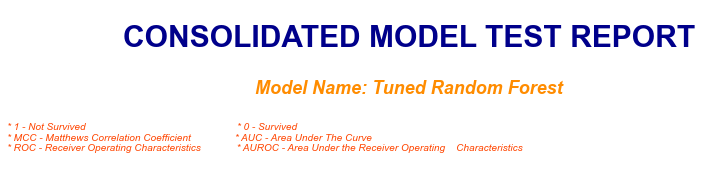

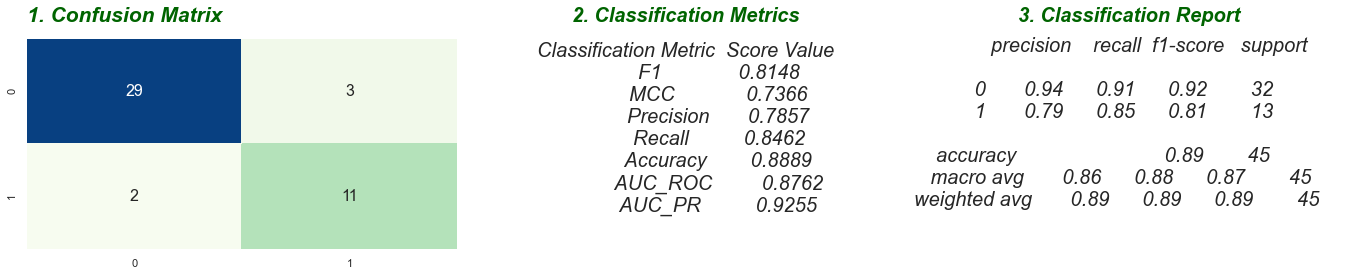

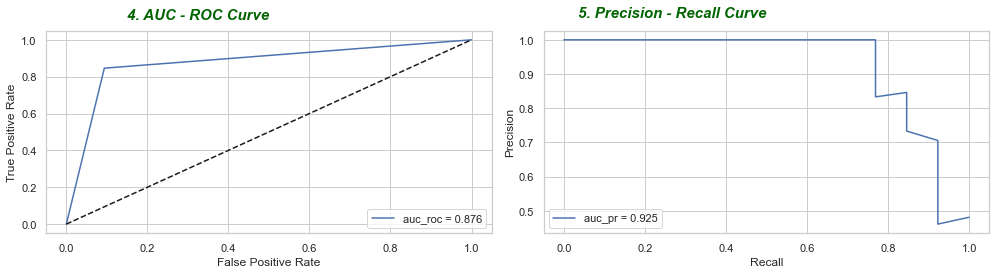

In [21]:
# Random Forest with Best Hypertuned Parameters
best_forest = forest_grid.best_estimator_

best_forest = best_forest.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(best_forest, X_test, y_test, model_name="Tuned Random Forest")

### 4. Extreme Gradient Boosting - XGBoost

[18:01:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


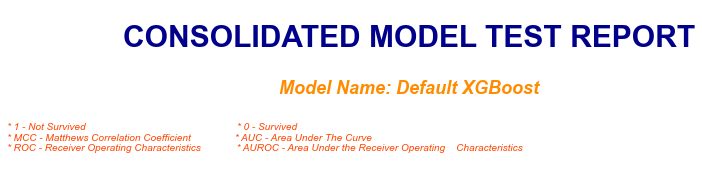

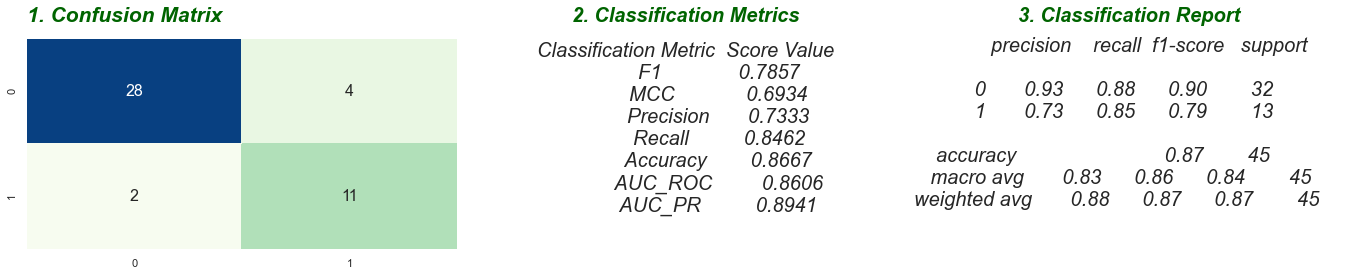

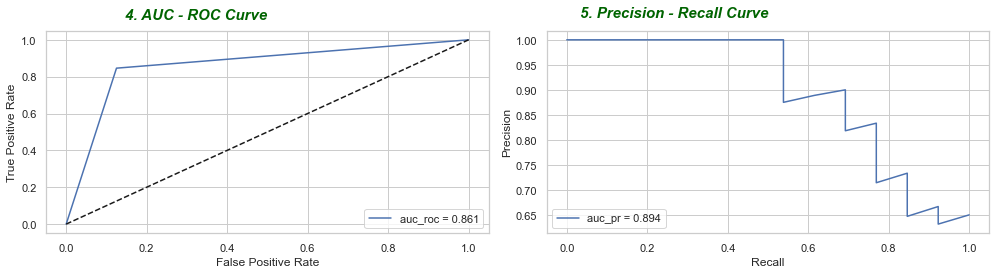

In [23]:
# XGBoost with Default Parameters
xgb = XGBClassifier(n_jobs = -1, random_state = 100)

xgb = xgb.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(xgb, X_test, y_test, model_name="Default XGBoost")

In [27]:
utils.plot_model_feature_importances(X_train_resampled, model = xgb)

TypeError: plot_model_feature_importances() got multiple values for argument 'model'

#### XG Boost Hyperparameters Tuning

In [28]:
# XGBoost with Default Parameters
xgb = XGBClassifier(n_jobs = -1, random_state = 100)

param_grid = {'max_depth': range(4, 40),
             'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 0.6, 0.9, 0.95, 0.99],
             'n_estimators': range(100, 1100, 100),
             'min_child_weight': range(1, 11),
             'subsample': np.arange(0.1, 1.1, 0.1),
             'colsample_bytree': np.arange(0.1, 1.1, 0.1)}

# Instantiating RandomizedSearchCV object 
xgb_grid = RandomizedSearchCV(xgb, param_grid, cv = 5) 
    
# fitting the model for grid search 
xgb_grid.fit(X_train.values, y_train.values.ravel())
    
# get the best parameter from gird search 
print("Best Parameters:", xgb_grid.best_params_) 
  
# get the best classifier model after hyper-parameter tuning 
print("\nBest Classifier:", xgb_grid.best_estimator_)

[18:04:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:04:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:04:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:04:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

[18:04:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:04:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:04:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:04:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

[18:04:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


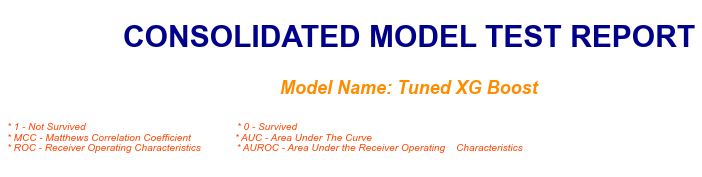

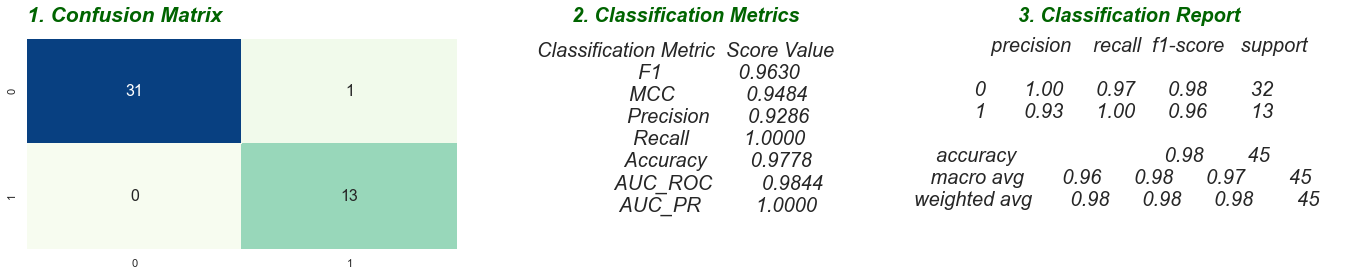

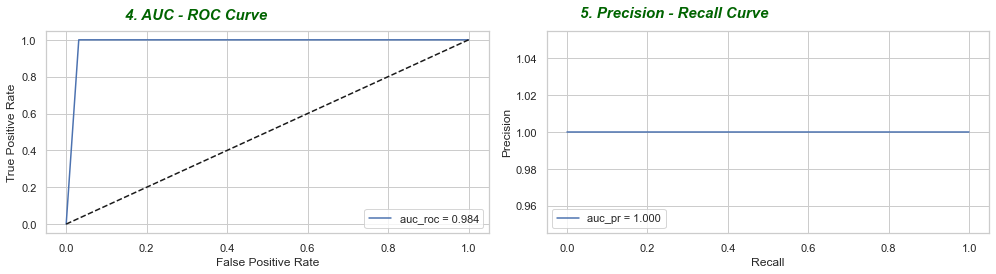

In [29]:
# XG Boost with Best Hypertuned Parameters
best_xgb = xgb_grid.best_estimator_

best_xgb.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(best_xgb, X_test, y_test, model_name="Tuned XG Boost")

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

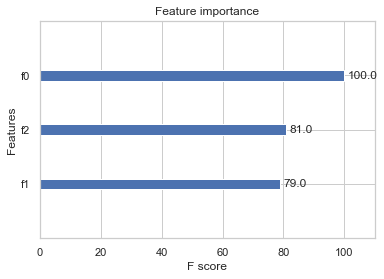

In [30]:
# plot_model_feature_importances(model = best_xgb) # this throws an error sometimes - 
# AttributeError: 'XGBClassifier' object has no attribute 'feature_importances_'
# XGBoostError: need to call fit or 'load_model' beforehand

from xgboost import plot_importance

plot_importance(best_xgb)

In [32]:
import shap
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_test)

ModuleNotFoundError: No module named 'shap'

In [ ]:
shap.summary_plot(shap_values, X_test)

### 5. Light Gradient Boosted Machine

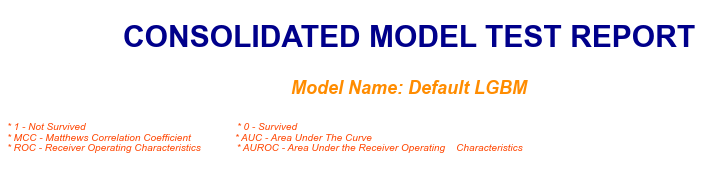

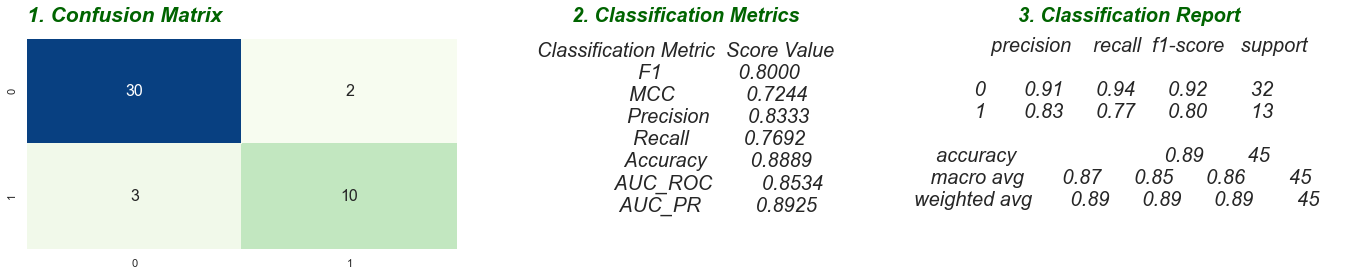

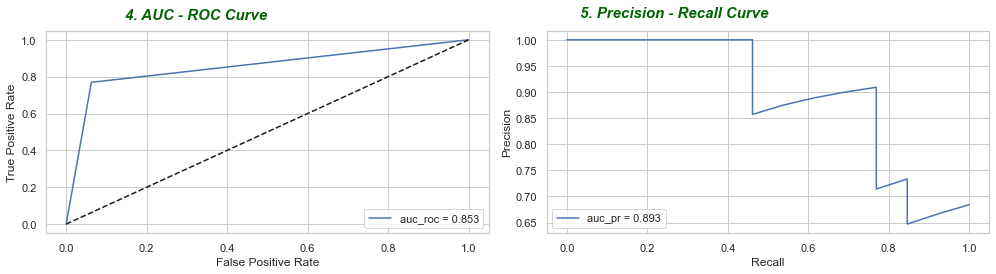

In [34]:
# LightGBM with Default Parameters
lgb = LGBMClassifier(objective = 'binary', n_jobs = -1, random_state = 100)

lgb.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(lgb, X_test, y_test, model_name="Default LGBM")

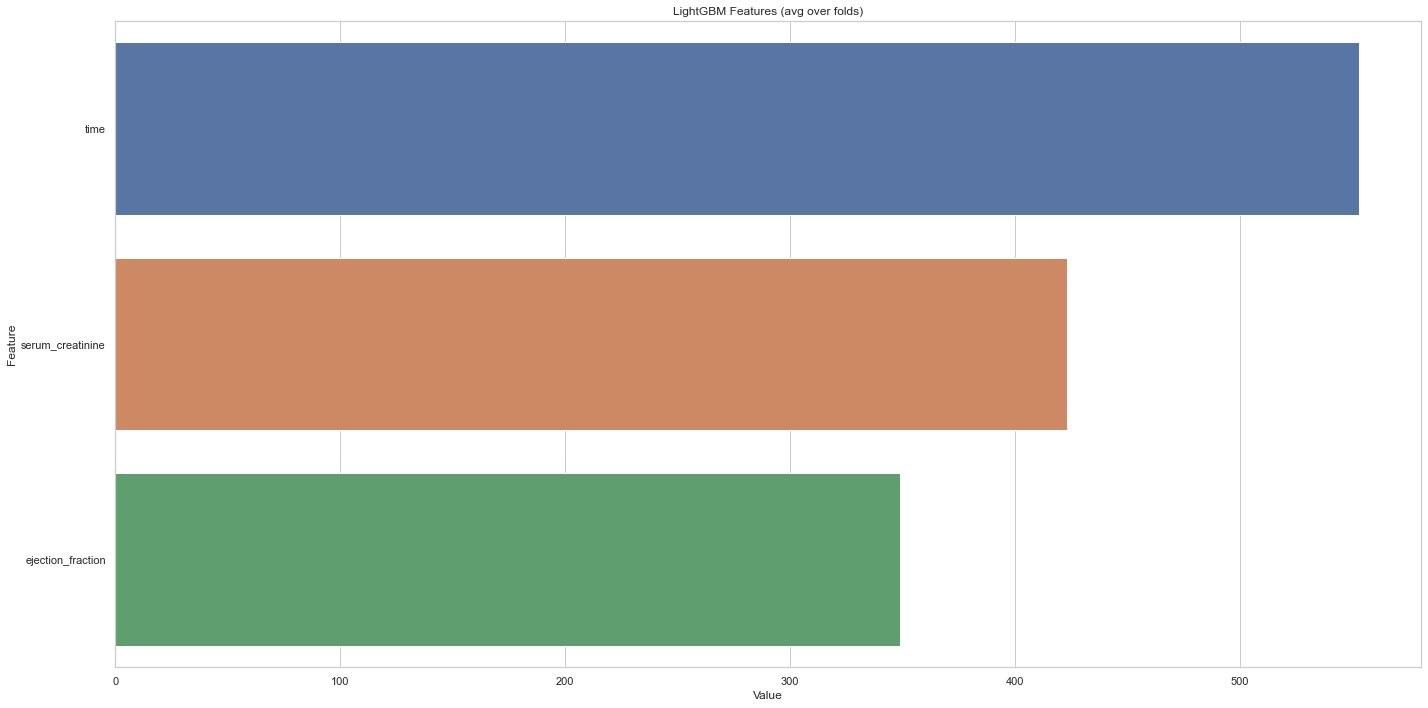

In [35]:
# plot_model_feature_importances(model = lgb)

feature_imp = pd.DataFrame(sorted(zip(lgb.feature_importances_, X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

#### LGBM Hyperparameter Tuning

In [36]:
# LGBM with Default Parameters
lgb = LGBMClassifier(objective = 'binary', n_jobs = -1, random_state = 100)

param_grid = {'max_depth': range(4, 40),
              'num_leaves': range(20, 100),
             'learning_rate': np.arange(0.1, 1.0, 0.1),
             'n_estimators': range(100, 1100, 100),
             'min_child_samples': range(1, 72),
             'subsample': np.arange(0.1, 1.1, 0.1),
             'colsample_bytree': np.arange(0.1, 1.1, 0.1)}

# Instantiating RandomizedSearchCV object 
lgb_grid= RandomizedSearchCV(lgb, param_grid, cv = 5) 
    
# fitting the model for grid search 
lgb_grid = lgb_grid.fit(X_train_resampled.values, y_train_resampled.values.ravel())
    
# get the best parameter from gird search 
print("Best Parameters:", lgb_grid.best_params_) 
  
# get the best classifier model after hyper-parameter tuning 
print("\nBest Classifier:", lgb_grid.best_estimator_)

Best Parameters: {'subsample': 0.6, 'num_leaves': 69, 'n_estimators': 100, 'min_child_samples': 4, 'max_depth': 13, 'learning_rate': 0.30000000000000004, 'colsample_bytree': 1.0}

Best Classifier: LGBMClassifier(learning_rate=0.30000000000000004, max_depth=13,
               min_child_samples=4, num_leaves=69, objective='binary',
               random_state=100, subsample=0.6)


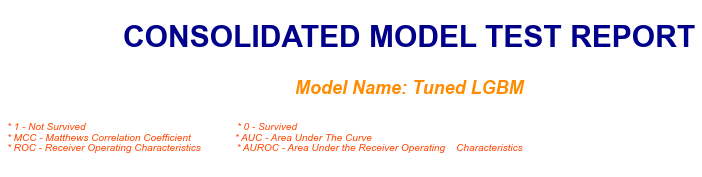

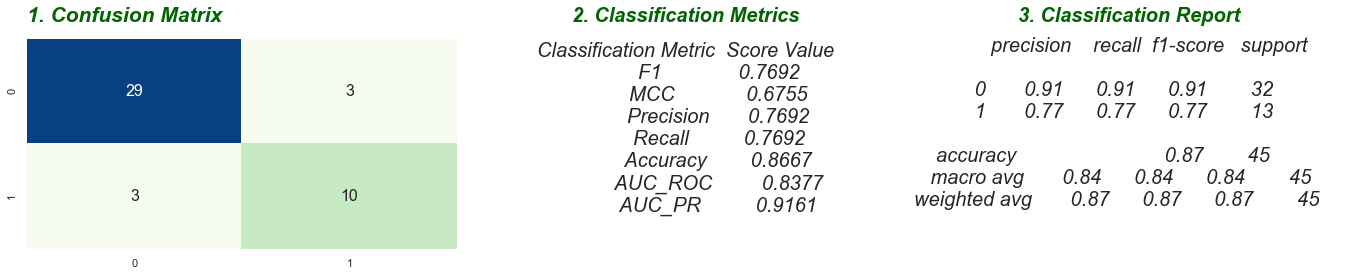

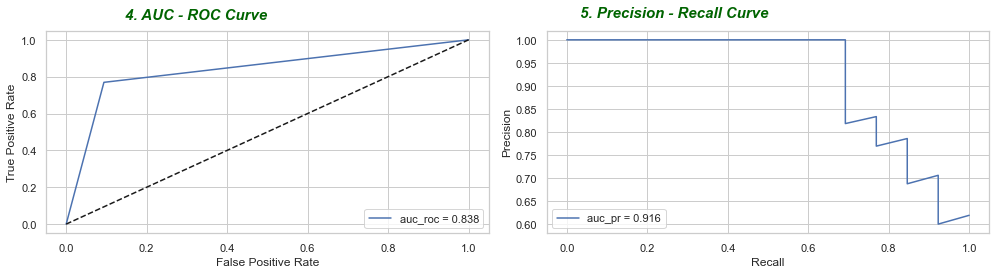

In [37]:
# LGBM with Best Hypertuned Parameters
best_lgb = lgb_grid.best_estimator_

best_lgb.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(best_lgb, X_test, y_test, model_name="Tuned LGBM")

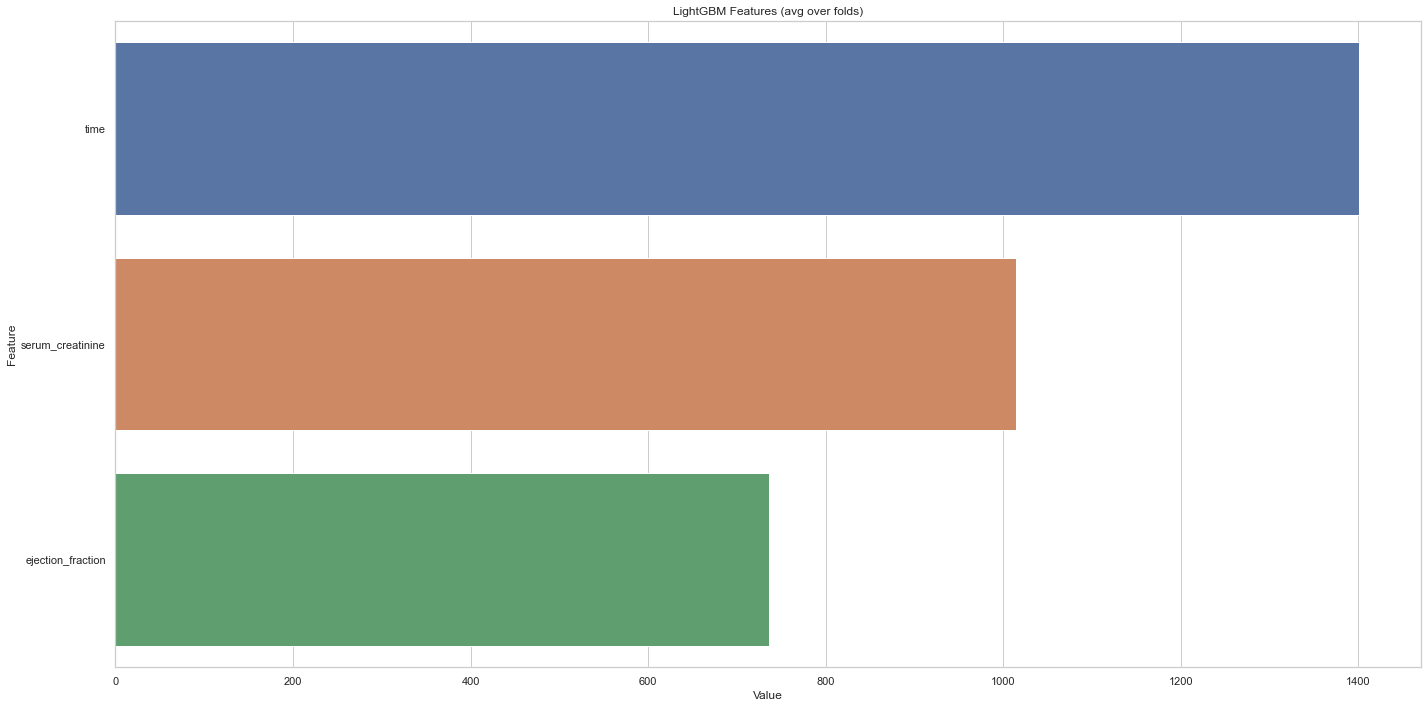

In [38]:
feature_imp = pd.DataFrame(sorted(zip(best_lgb.feature_importances_, X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

In [ ]:
explainer = shap.TreeExplainer(best_lgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

**`The above chart shows the impact of the features on the model's output for each class.`**

# Inferences

**`1. 'age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time' seem to be the features that are more closely related to the death event.`**

**`2. The event of a heart failure in the old age could be fatal.`**

**`3. The levels of 'ejection_fraction', 'serum_creatinine', 'serum_sodium' play an important role in the event of heart failure or the abnormalities in the levels of these become an important factor in triggerring heart failure condition.`**

**`4. Random Forest, XGBoost and LightGBM turn out to be the better models in predicting the event of death given the vital parameters that effect heart failure of Cardiovascular conditions.`**

**`5. Machine Learning models can prove to be a time saving factor in predicting the event of death and can help the doctors take additional precauionary measures with critical care.`**

**`6. The imbalance in the dataset had been dealt using the SMOTE oversampling of the minority class. SMOTE balanced the no. of instances for each class but the amount of data is still limited.`**

**`7. The accuracy and model performance can be increased as more data is collected and made available for the model to train on. This data limitation, limits the model performance to some extent. As more and more data becomes available, the prediction accuracy and model's ability to act on other similar real-time data could be enhanced.`**